<a href="https://colab.research.google.com/github/MohammedEsamaldin/week1_10academy/blob/main/notebooks/User_Engagement_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

In [3]:
db = pd.read_csv('/content/drive/MyDrive/Week-1/data/Week1_challenge_data_source(CSV).csv',  na_values=['?', None])
db.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
def fix_missing_mode(df, col):
    df[col] = df[col].fillna(df[col].mode()[0])
    return df[col]


In [5]:
list_col = ['Dur. (ms)',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B']
for i in list_col:
    fix_missing_mode(db, i)

db.isnull().sum()

Bearer Id                                    991
Start                                          1
Start ms                                       1
End                                            1
End ms                                         1
Dur. (ms)                                      0
IMSI                                         570
MSISDN/Number                               1066
IMEI                                           0
Last Location Name                             0
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        0
Avg Bearer TP UL (kbps)                        0
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)                             0
UL TP < 10 Kbps (%) 

In [6]:
db = db.dropna()

In [ ]:
df = db

In [8]:
df['total DL/UL traffic']= df['Total DL (Bytes)']+df['Total UL (Bytes)']
df['total DL/UL traffic'].head(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Series([], Name: total DL/UL traffic, dtype: float64)

In [9]:
df['Handset Type'].value_counts().head(10)

Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
undefined                        8904
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Name: Handset Type, dtype: int64

In [10]:
top_handset_manu = df['Handset Manufacturer'].value_counts().head(3)
top_handset_manu

Apple      59339
Samsung    40429
Huawei     34296
Name: Handset Manufacturer, dtype: int64

In [11]:
top_handset = df.groupby(['Handset Manufacturer'] ).agg({'Handset Type':'count'})#.value_counts()
top_handset.sort_values(by = ['Handset Type'],ascending =False).head(3)
#top_top.groupby(['Handset Manufacturer']).head() ///,'Samsung','Huawei'

,Handset Type
Handset Manufacturer,
Apple,59339
Samsung,40429
Huawei,34296


In [12]:

agg_data = df.groupby(['MSISDN/Number']).agg({'Bearer Id':'count','Dur. (ms)':'sum','total DL/UL traffic':'sum'})
agg_data.head(10)

,Bearer Id,Dur. (ms),total DL/UL traffic
MSISDN/Number,,,
3.360100e+10,1,116720.0,8.786906e+08
3.360100e+10,1,181230.0,1.568596e+08
3.360100e+10,1,134969.0,5.959665e+08
3.360101e+10,1,49878.0,4.223207e+08
3.360101e+10,2,37104.0,1.457411e+09
3.360101e+10,2,253983.0,6.152172e+08
3.360101e+10,2,128360.0,6.547231e+08
3.360101e+10,1,86399.0,3.326604e+08
3.360101e+10,2,495702.0,9.901322e+08


In [13]:
data_agg = agg_data[['Bearer Id','Dur. (ms)','total DL/UL traffic']]
data_agg.head()

,Bearer Id,Dur. (ms),total DL/UL traffic
MSISDN/Number,,,
3.360100e+10,1,116720.0,8.786906e+08
3.360100e+10,1,181230.0,1.568596e+08
3.360100e+10,1,134969.0,5.959665e+08
3.360101e+10,1,49878.0,4.223207e+08
3.360101e+10,2,37104.0,1.457411e+09


In [14]:
# top 10 customers per sessions frequency 
top_customer_session = agg_data.sort_values(by ='Bearer Id', ascending= False )
top_customer_session.head(10)

,Bearer Id,Dur. (ms),total DL/UL traffic
MSISDN/Number,,,
3.362632e+10,18,8791927.0,7.971167e+09
3.361489e+10,17,9966898.0,8.846226e+09
3.362578e+10,17,18553754.0,8.499621e+09
3.365973e+10,16,4035428.0,7.705863e+09
3.376054e+10,15,9279434.0,8.514774e+09
3.367588e+10,15,4865947.0,7.891111e+09
3.366716e+10,13,8744914.0,5.618394e+09
3.360452e+10,12,5207990.0,5.487855e+09
3.376041e+10,12,5321667.0,7.132371e+09


In [15]:
#top 10 customers perthe duration of the session 
top_customer_Duration = agg_data.sort_values(by ='Dur. (ms)', ascending= False )
top_customer_Duration.head(10)


,Bearer Id,Dur. (ms),total DL/UL traffic
MSISDN/Number,,,
3.362578e+10,17,18553754.0,8.499621e+09
3.361489e+10,17,9966898.0,8.846226e+09
3.376054e+10,15,9279434.0,8.514774e+09
3.362632e+10,18,8791927.0,7.971167e+09
3.366716e+10,13,8744914.0,5.618394e+09
3.366284e+10,9,6614270.0,4.000098e+09
3.366469e+10,9,6288730.0,5.682007e+09
3.360313e+10,12,6287761.0,4.976195e+09
3.366746e+10,6,5649882.0,2.600522e+09


In [16]:
#top 10 customers per the sessions total traffic (download and upload (bytes))
top_customer_Traffic = agg_data.sort_values(by ='total DL/UL traffic', ascending= False )
top_customer_Traffic.head(10)


,Bearer Id,Dur. (ms),total DL/UL traffic
MSISDN/Number,,,
3.361489e+10,17,9966898.0,8.846226e+09
3.376054e+10,15,9279434.0,8.514774e+09
3.362578e+10,17,18553754.0,8.499621e+09
3.362632e+10,18,8791927.0,7.971167e+09
3.367588e+10,15,4865947.0,7.891111e+09
3.365973e+10,16,4035428.0,7.705863e+09
3.366646e+10,11,4536757.0,7.308501e+09
3.376041e+10,12,5321667.0,7.132371e+09
3.366471e+10,11,2927785.0,6.872018e+09


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [18]:
#clustering by K-mean
metrics = ['Bearer Id','Dur. (ms)','total DL/UL traffic']
cluster_data= data_agg.loc[:,metrics].values
cluster_data =StandardScaler().fit_transform(cluster_data)
nrom_data =pd.DataFrame(cluster_data,columns = metrics)
nrom_data.head()

,Bearer Id,Dur. (ms),total DL/UL traffic
0,-0.489228,-0.160009,0.380796
1,-0.489228,0.185775,-1.087759
2,-0.489228,-0.062191,-0.194402
3,-0.489228,-0.518292,-0.547682
4,0.749944,-0.586763,1.558196


In [19]:
np.mean(cluster_data), np.std(cluster_data), cluster_data.shape

(-5.481233703427496e-17, 1.0, (106471, 3))

In [20]:
# Fitting the data with kmeans of k=3

kmeans = KMeans(3)
kmeans.fit(cluster_data)
clusters = kmeans.fit_predict(cluster_data)
centroids = kmeans.cluster_centers_
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [21]:
nrom_data['cluster_num'] = clusters
nrom_data

,Bearer Id,Dur. (ms),total DL/UL traffic,cluster_num
0,-0.489228,-0.160009,0.380796,1
1,-0.489228,0.185775,-1.087759,1
2,-0.489228,-0.062191,-0.194402,1
3,-0.489228,-0.518292,-0.547682,1
4,0.749944,-0.586763,1.558196,0
...,...,...,...,...
106466,-0.489228,-0.738423,0.047041,1
106467,-0.489228,-0.029928,-0.429709,1
106468,-0.489228,3.917273,-0.934635,1
106469,-0.489228,0.570634,-0.193748,1


In [36]:
non_nor_data = agg_data[metrics]
non_nor_data['Cluster NO']= clusters
non_nor_data.sort_values(by ='Bearer Id', ascending=False).head(20) 

,Bearer Id,Dur. (ms),total DL/UL traffic,Cluster NO
MSISDN/Number,,,,
3.362632e+10,18,8791927.0,7.971167e+09,2
3.361489e+10,17,9966898.0,8.846226e+09,2
3.362578e+10,17,18553754.0,8.499621e+09,2
3.365973e+10,16,4035428.0,7.705863e+09,2
3.376054e+10,15,9279434.0,8.514774e+09,2
3.367588e+10,15,4865947.0,7.891111e+09,2
3.366716e+10,13,8744914.0,5.618394e+09,2
3.360452e+10,12,5207990.0,5.487855e+09,2
3.376041e+10,12,5321667.0,7.132371e+09,2


In [61]:
cluster_data_max = non_nor_data.groupby(['Cluster NO']).agg({'Bearer Id':'max','Dur. (ms)':'max','total DL/UL traffic':'max'})
metrics = ['Bearer Id','Dur. (ms)','total DL/UL traffic']
cluster_values=  cluster_data_max.loc[:,metrics].values
cluster_max = pd.DataFrame(cluster_values, columns = metrics)
cluster_max.head()

,Bearer Id,Dur. (ms),total DL/UL traffic
0,4.0,1480875.0,2.512802e+09
1,2.0,1035261.0,9.507607e+08
2,18.0,18553754.0,8.846226e+09


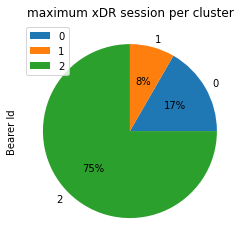

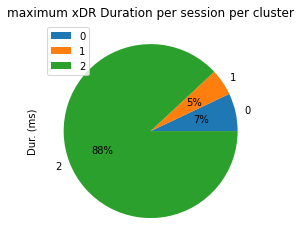

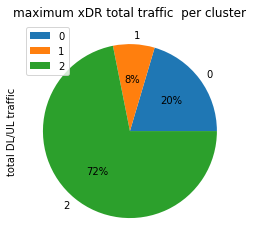

In [64]:
cluster_max.plot(kind = 'pie' , y= 'Bearer Id',autopct='%1.0f%%',title = 'maximum xDR session per cluster')
cluster_max.plot(kind = 'pie' , y='Dur. (ms)',autopct='%1.0f%%',title = 'maximum xDR Duration per session per cluster')
cluster_max.plot(kind = 'pie' , y= 'total DL/UL traffic',autopct='%1.0f%%',title = 'maximum xDR total traffic  per cluster')

In [63]:
cluster_data_min = non_nor_data.groupby(['Cluster NO']).agg({'Bearer Id':'min','Dur. (ms)':'min','total DL/UL traffic':'min'})
cluster_values=  cluster_data_min.loc[:,metrics].values
cluster_min = pd.DataFrame(cluster_values, columns = metrics)
cluster_min.head()

,Bearer Id,Dur. (ms),total DL/UL traffic
0,1.0,18235.0,177006936.0
1,1.0,7142.0,33249009.0
2,1.0,66594.0,370420998.0


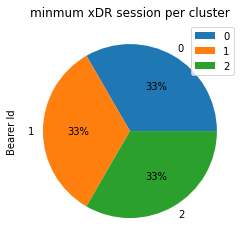

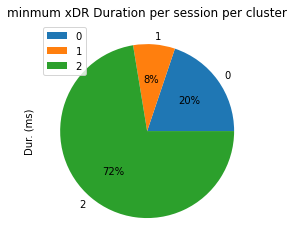

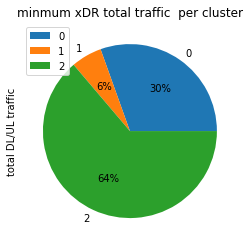

In [65]:
cluster_min.plot(kind = 'pie' , y= 'Bearer Id',autopct='%1.0f%%',title = 'minmum xDR session per cluster')
cluster_min.plot(kind = 'pie' , y='Dur. (ms)',autopct='%1.0f%%',title = 'minmum xDR Duration per session per cluster')
cluster_min.plot(kind = 'pie' , y= 'total DL/UL traffic',autopct='%1.0f%%',title = 'minmum xDR total traffic  per cluster')

In [58]:
cluster_data_avg = non_nor_data.groupby(['Cluster NO']).agg({'Bearer Id':'mean','Dur. (ms)':'mean','total DL/UL traffic':'mean'})
cluster_values=  cluster_data_avg.loc[:,metrics].values
cluster_avg = pd.DataFrame(cluster_values, columns = metrics)
cluster_avg.head()

,Bearer Id,Dur. (ms),total DL/UL traffic
0,2.182967,215444.262113,1.116377e+09
1,1.028125,103465.181605,4.949902e+08
2,4.410835,658335.767494,2.292033e+09


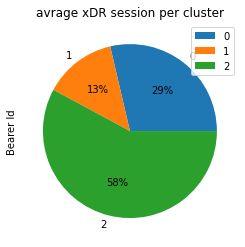

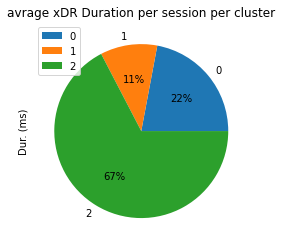

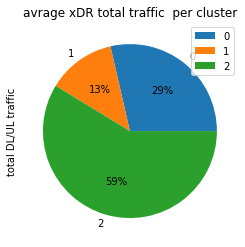

In [66]:
cluster_avg.plot(kind = 'pie' , y= 'Bearer Id',autopct='%1.0f%%',title = 'avrage xDR session per cluster')
cluster_avg.plot(kind = 'pie' , y='Dur. (ms)',autopct='%1.0f%%',title = 'avrage xDR Duration per session per cluster')
cluster_avg.plot(kind = 'pie' , y= 'total DL/UL traffic',autopct='%1.0f%%',title = 'avrage xDR total traffic  per cluster')

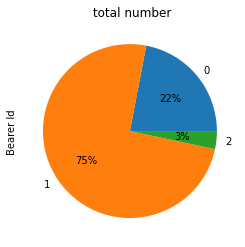

In [75]:
total = non_nor_data.groupby(['Cluster NO'])['Bearer Id'].agg('count')
total.plot(kind = 'pie', y = 'Bearer Id',autopct='%1.0f%%', title = " total number")

In [76]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [84]:
df['DL/UL Social Media'] = df['Social Media DL (Bytes)']+ df['Social Media UL (Bytes)']
df['DL/UL Netflix '] = df['Netflix DL (Bytes)']+ df['Netflix UL (Bytes)']
df['DL/UL Google '] = df['Google DL (Bytes)']+ df[ 'Google UL (Bytes)']
df['DL/UL Gaming'] = df[ 'Gaming DL (Bytes)']+ df['Gaming UL (Bytes)']
df['DL/UL Other'] = df['Other DL (Bytes)']+ df['Other UL (Bytes)']
df['DL/UL Email'] = df['Email UL (Bytes)']+ df['Email DL (Bytes)']
df['DL/UL Youtube'] = df['Youtube DL (Bytes)']+ df['Youtube UL (Bytes)']
df = df.drop(columns=['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)'],axis =1)


In [85]:

df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [ ]:
apps_agg_data = df.groupby(['MSISDN/Number']).agg({ 'DL/UL Social Media':'sum', 'DL/UL Netflix ':'sum',
       'DL/UL Google ':'sum', 'DL/UL Gaming':'sum', 'DL/UL Other':'sum', 'DL/UL Email':'sum',
       'DL/UL Youtube':'sum'})
apps_agg_data.head(10)



In [93]:
top_social = apps_agg_data.sort_values(by =  'DL/UL Social Media', ascending = False)
top_social.loc[:,['DL/UL Social Media']].head(10)

,DL/UL Social Media
MSISDN/Number,
3.362632e+10,43374779.0
3.376054e+10,39783189.0
3.365973e+10,35412358.0
3.361489e+10,28294544.0
3.362578e+10,27135500.0
3.366716e+10,24247850.0
3.378632e+10,23974919.0
3.366907e+10,23800834.0
3.360313e+10,23077825.0


In [95]:
top_youtube = apps_agg_data.sort_values(by =  'DL/UL Youtube', ascending = False)
top_social.loc[:,['DL/UL Youtube']].head(10)

,DL/UL Youtube
MSISDN/Number,
3.362632e+10,374483047.0
3.376054e+10,396289198.0
3.365973e+10,257991088.0
3.361489e+10,394370218.0
3.362578e+10,452958769.0
3.366716e+10,315231310.0
3.378632e+10,214763912.0
3.366907e+10,236402804.0
3.360313e+10,284090139.0


In [96]:
top_Netflix = apps_agg_data.sort_values(by =  'DL/UL Netflix ', ascending = False)
top_Netflix.loc[:,['DL/UL Netflix ']].head(10)


,DL/UL Netflix
MSISDN/Number,
3.365973e+10,399519079.0
3.361489e+10,361401046.0
3.362578e+10,356980607.0
3.376054e+10,334643269.0
3.362632e+10,328725740.0
3.376041e+10,318347546.0
3.366716e+10,313939488.0
3.367588e+10,309093159.0
3.378632e+10,305939790.0


In [97]:
top_others = apps_agg_data.sort_values(by =   'DL/UL Other', ascending = False)
top_others.loc[:,[ 'DL/UL Other']].head(10)


,DL/UL Other
MSISDN/Number,
3.362632e+10,8.167878e+09
3.361489e+10,7.639264e+09
3.367588e+10,6.798515e+09
3.362578e+10,6.354583e+09
3.360313e+10,6.326671e+09
3.365973e+10,6.317415e+09
3.362695e+10,5.305448e+09
3.362708e+10,5.117791e+09
3.376127e+10,5.077779e+09


In [98]:
top_Google = apps_agg_data.sort_values(by =   'DL/UL Google ', ascending = False)
top_Google.loc[:,[ 'DL/UL Google ']].head(10)


,DL/UL Google
MSISDN/Number,
3.362632e+10,152191852.0
3.362578e+10,142307915.0
3.361489e+10,127973787.0
3.376054e+10,123223099.0
3.365973e+10,116516345.0
3.378632e+10,110254484.0
3.367588e+10,109860502.0
3.366716e+10,105032696.0
3.376127e+10,97089988.0


In [99]:
top_Gaming = apps_agg_data.sort_values(by =  'DL/UL Gaming', ascending = False)
top_Gaming.loc[:,['DL/UL Gaming']].head(10)


,DL/UL Gaming
MSISDN/Number,
3.361489e+10,7.749432e+09
3.376054e+10,7.461045e+09
3.362578e+10,7.326673e+09
3.367588e+10,6.970568e+09
3.362632e+10,6.887572e+09
3.365973e+10,6.725559e+09
3.366646e+10,6.646303e+09
3.376041e+10,6.268620e+09
3.366471e+10,6.103856e+09


In [100]:
top_Email = apps_agg_data.sort_values(by = 'DL/UL Email', ascending = False)
top_Email.loc[:,['DL/UL Email']].head(10)

,DL/UL Email
MSISDN/Number,
3.362632e+10,42418782.0
3.361489e+10,40788634.0
3.362578e+10,40633966.0
3.378632e+10,36310123.0
3.365973e+10,35999792.0
3.376054e+10,33693767.0
3.367588e+10,31514421.0
3.366546e+10,30417885.0
3.366716e+10,30335796.0


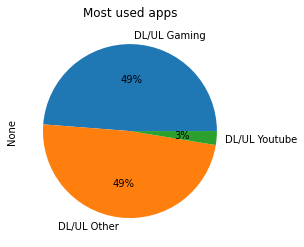

In [118]:
top_apps = apps_agg_data.agg('sum')
plot_top = top_apps.sort_values(ascending = False).head(3)
plot_top.plot(kind = 'pie', y = 'sum',autopct='%1.0f%%', title =  'Most used apps')